In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("online_retail_customer_churn.csv")


In [ ]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [ ]:
df.shape

(1000, 15)

In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
df['Purchase'] = df['Target_Churn'].apply(lambda x: 0 if x == 1 else 1)
df.drop(['Customer_ID', 'Target_Churn'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0
Satisfaction_Score,0


In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

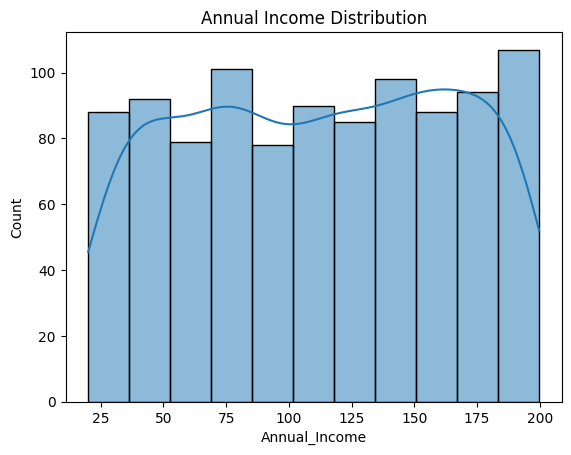

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Annual_Income'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

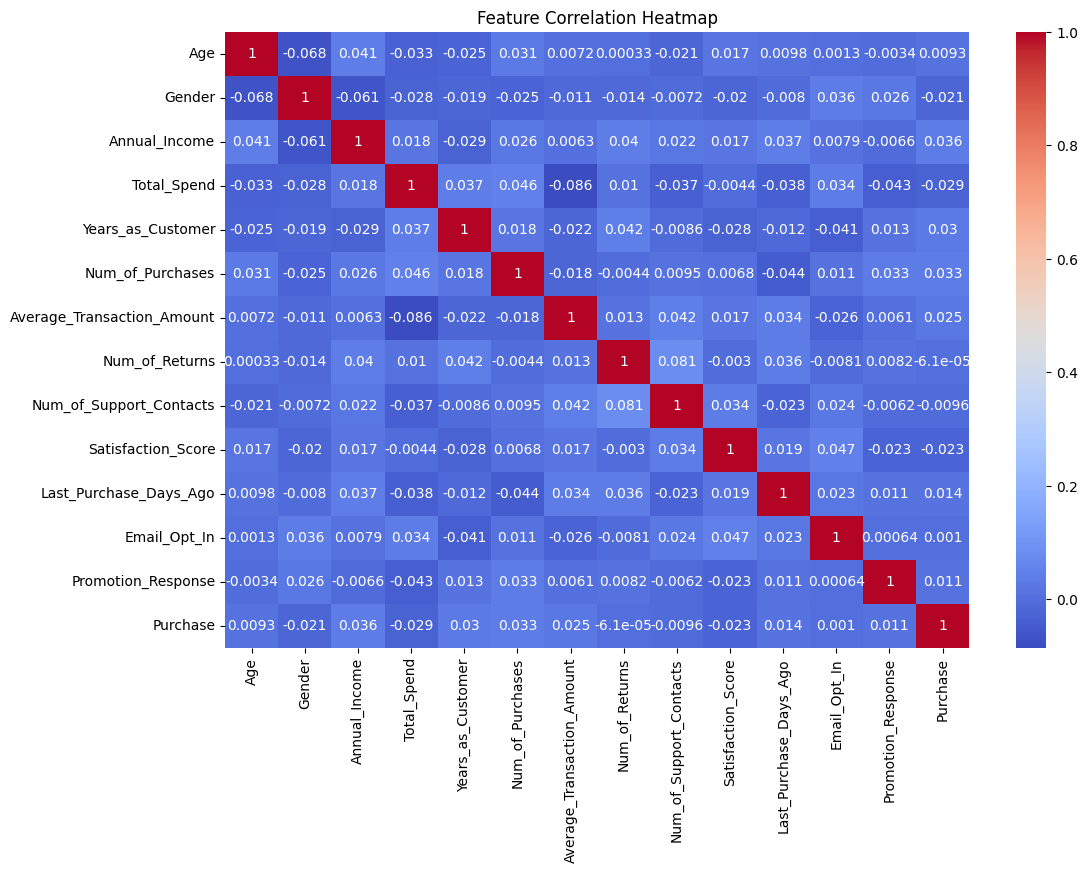

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

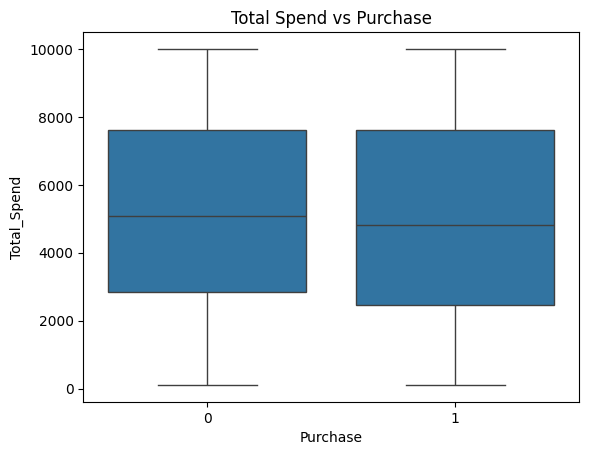

In [ ]:
sns.boxplot(x='Purchase', y='Total_Spend', data=df)
plt.title("Total Spend vs Purchase")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [ ]:
results = pd.DataFrame({
    "Logistic Regression": evaluate(y_test, lr_pred),
    "Decision Tree": evaluate(y_test, dt_pred),
    "Random Forest": evaluate(y_test, rf_pred),
    "KNN": evaluate(y_test, knn_pred)
}).T

results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.500,0.434783,0.212766,0.285714
Decision Tree,0.525,0.494845,0.510638,0.502618
Random Forest,0.530,0.500000,0.329787,0.397436
KNN,0.510,0.476190,0.425532,0.449438


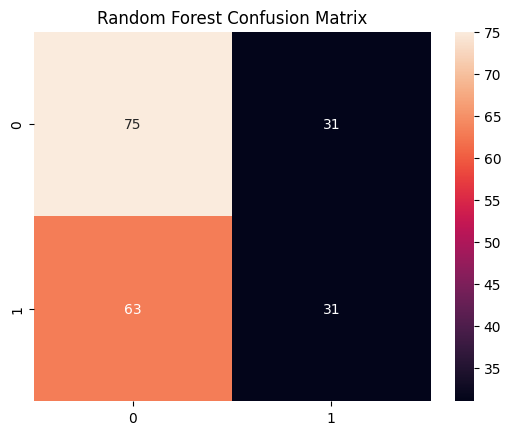

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()